## Geospatial Data with netCDFs and `xarray`

If you work with geospatial data, you will most likely encounter the netCDF file type. NetCDFs are a very space-efficient way of storing geospatial data.

There are several ways to read in netCDF files into Python - we will be using `xarray`, because it has many useful capabilities for data cleaning and formatting, statistical analysis, and parallel processing/handling large amounts of data.

In [1]:
# Import everything that we are going to need
import pandas as pd
import xarray as xr
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [ ]:
xr. 

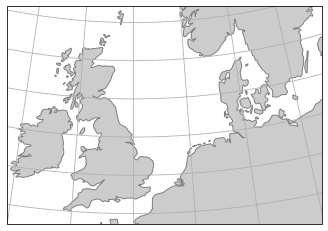

In [5]:
def make_map():
    # create figure and axes instances
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=ccrs.Stereographic(central_latitude=60))
    #ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_extent([-10, 15, 49, 60], crs=ccrs.PlateCarree())
    
    gl = ax.gridlines(draw_labels=False)
    
    feature = cartopy.feature.NaturalEarthFeature(name='coastline',
                                                  category='physical',
                                                  scale='50m',
                                                  edgecolor='0.5',
                                                  facecolor='0.8')
    ax.add_feature(feature)
    return fig, ax

make_map()
plt.show()

In [10]:
GETM = xr.open_dataset('../../data/cefas_GETM_nwes.nc4')
GETM

<xarray.Dataset>
Dimensions:     (latc: 360, level: 5, lonc: 396, time: 6)
Coordinates:
  * latc        (latc) float64 45.4 45.45 45.5 45.55 ... 63.2 63.25 63.3 63.35
  * level       (level) float64 1.0 6.0 11.0 16.0 21.0
  * lonc        (lonc) float64 -17.5 -17.42 -17.34 -17.26 ... 13.94 14.02 14.1
  * time        (time) datetime64[ns] 1996-02-01T01:00:00 ... 1996-02-06T01:0...
Data variables:
    bathymetry  (latc, lonc) float64 ...
    h           (time, level, latc, lonc) float32 ...
    temp        (time, level, latc, lonc) float32 ...
Attributes:
    title:                     North West European Shelf 3nm
    history:                   Sun Nov 20 00:54:48 2016: ncks -v time,latc,lo...
    NCO:                       4.4.8
    nco_openmp_thread_number:  1

In [14]:
# First get the bathy and temp data
bathy = GETM['bathymetry']
bedtemp = GETM['temp'].mean('time').isel(level=0)

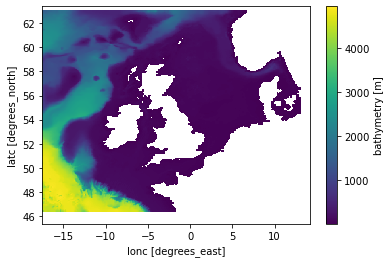

In [20]:
bathy.plot();

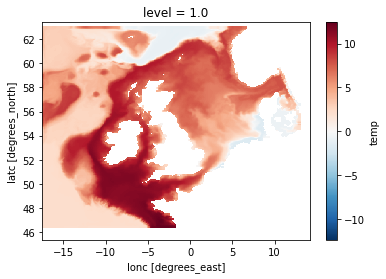

In [22]:
bedtemp.plot();

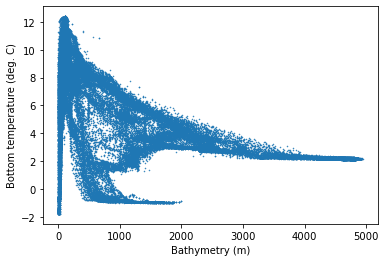

In [23]:
# Make a simple scatter plot
fig, ax = plt.subplots()
ax.scatter(bathy,bedtemp,marker='.',s=1.0)
ax.set_xlabel('Bathymetry (m)')
ax.set_ylabel('Bottom temperature (deg. C)');